In [105]:
#importing libraries
#pandas to load data
import pandas as pd
import numpy as np
#importing visualizing libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
#loading the data into the dataframe df
df = pd.read_csv("heart.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [107]:
#No null values are present in this dataset
df.shape

(303, 14)

In [108]:
#Statistics of the dataframe
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [109]:
'''
age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
'''

'\nage\nsex\nchest pain type (4 values)\nresting blood pressure\nserum cholestoral in mg/dl\nfasting blood sugar > 120 mg/dl\nresting electrocardiographic results (values 0,1,2)\nmaximum heart rate achieved\nexercise induced angina\noldpeak = ST depression induced by exercise relative to rest\nthe slope of the peak exercise ST segment\nnumber of major vessels (0-3) colored by flourosopy\nthal: 3 = normal; 6 = fixed defect; 7 = reversable defect\n'

In [110]:
#Finding number of 0's and 1's in our target variable.
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

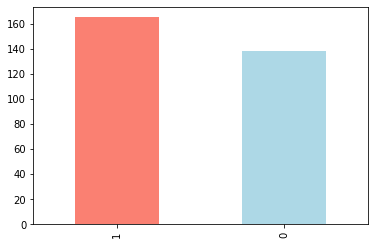

In [111]:
#Visualizing the target variable
df.target.value_counts().plot(kind = "bar" , color = ["salmon","lightblue"])

In [112]:
#Categorial and COntinuous values in the dataset
#f string :https://towardsdatascience.com/how-and-why-to-use-f-strings-in-python3-adbba724b251
categorical_val = []
continuous_val = []
for column in df.columns:
    print("*******************************************")
    print(f"{column}:{df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)

*******************************************
age:[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
*******************************************
sex:[1 0]
*******************************************
cp:[3 2 1 0]
*******************************************
trestbps:[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
*******************************************
chol:[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253

In [113]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [114]:
continuous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

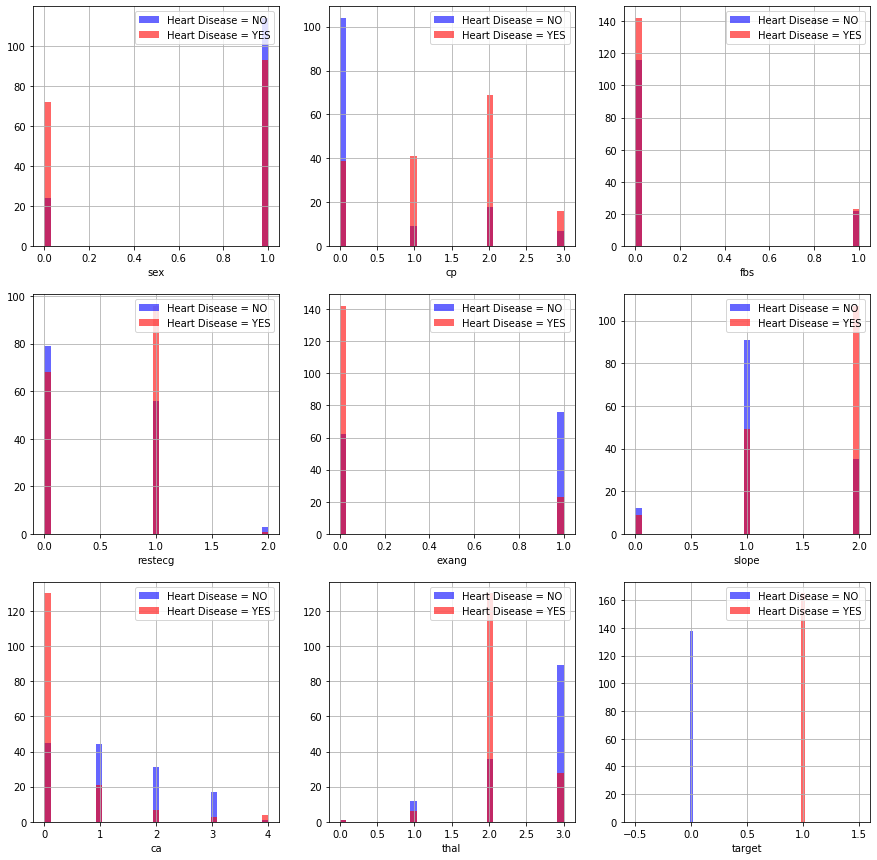

In [115]:
#Visualization of the target against Categorical values
plt.figure(figsize = (15,15))
for i,column in enumerate(categorical_val,1):
    plt.subplot(3,3,i)
    df[df["target"] == 0][column] . hist(bins = 35, color = "blue" , label = "Heart Disease = NO",alpha = 0.6)
    df[df["target"] == 1][column] . hist(bins = 35,color ="red" , label = "Heart Disease = YES" , alpha = 0.6)
    #All about legends : https://pythonspot.com/matplotlib-legend/
    plt.legend(loc='upper right')
    plt.xlabel(column)

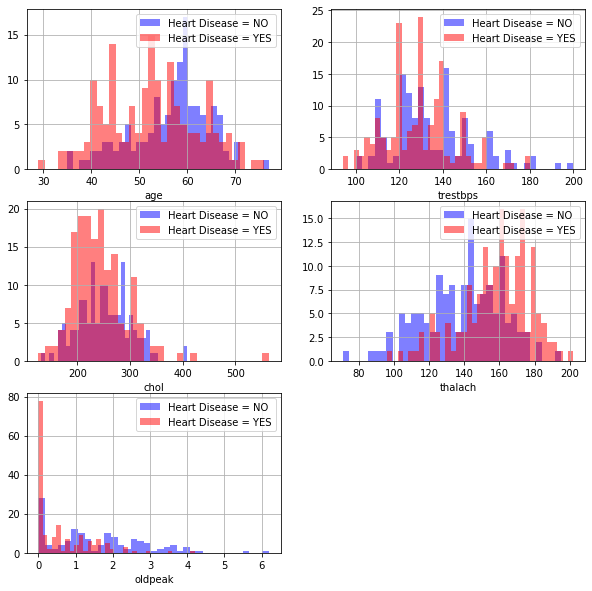

In [116]:
#Visualization of the target against Continuous values
plt.figure(figsize = (10,10))
for i,column in enumerate(continuous_val,1):
    plt.subplot(3,2,i)
    df[df["target"] == 0 ][column].hist(bins = 35 ,color = "blue" , label = "Heart Disease = NO " , alpha = 0.5)
    df[df["target"] == 1 ][column].hist(bins = 35 , color = "red" , label = "Heart Disease = YES" , alpha = 0.5)
    plt.legend(loc = "upper right")
    plt.xlabel(column)

(14.0, 0.0)

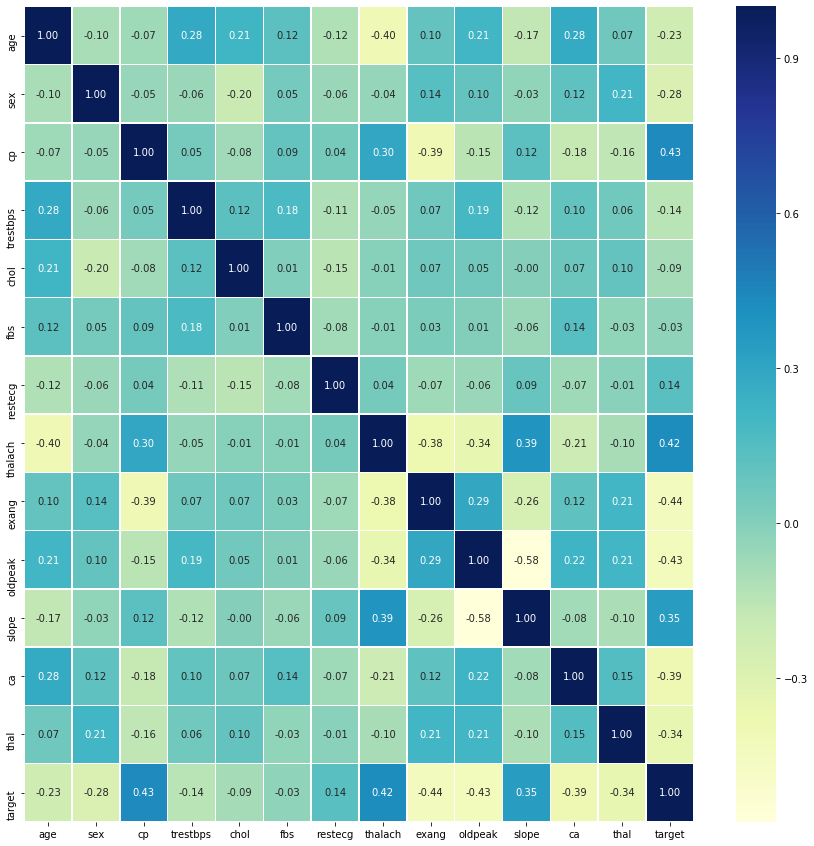

In [117]:
#Correlation Matrix for the dataset
#seaborn : https://indianaiproduction.com/seaborn-heatmap/#13-seaborn-heatmap-annot-parameter----add-a-number-on-each-cell-
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [118]:
#Data Preprocessing
#Initally convert the categorical values into dummie variables
#The get_dummies() function is used to convert categorical variable into dummy/indicator variables.
categorical_val.remove("target")
dataset = pd.get_dummies(df , columns = categorical_val)
dataset

age  trestbps  chol  thalach  oldpeak  target  sex_0  sex_1  cp_0  cp_1  \
0     63       145   233      150      2.3       1      0      1     0     0   
1     37       130   250      187      3.5       1      0      1     0     0   
2     41       130   204      172      1.4       1      1      0     0     1   
3     56       120   236      178      0.8       1      0      1     0     1   
4     57       120   354      163      0.6       1      1      0     1     0   
..   ...       ...   ...      ...      ...     ...    ...    ...   ...   ...   
298   57       140   241      123      0.2       0      1      0     1     0   
299   45       110   264      132      1.2       0      0      1     0     0   
300   68       144   193      141      3.4       0      0      1     1     0   
301   57       130   131      115      1.2       0      0      1     1     0   
302   57       130   236      174      0.0       0      1      0     0     1   

     ...  slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  thal_2  \
0    ...        0     1     0     0     0     0       0       1       0   
1    ...        0     1     0     0     0     0       0       0       1   
2    ...        1     1     0     0     0     0       0       0       1   
3    ...        1     1     0     0     0     0       0       0       1   
4    ...        1     1     0     0     0     0       0       0       1   
..   ...      ...   ...   ...   ...   ...   ...     ...     ...     ...   
298  ...        0     1     0     0     0     0       0       0       0   
299  ...        0     1     0     0     0     0       0       0       0   
300  ...        0     0     0     1     0     0       0       0       0   
301  ...        0     0     1     0     0     0       0       0       0   
302  ...        0     0     1     0     0     0       0       0       1   

     thal_3  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
298       1  
299       1  
300       1  
301       1  
302       0  

[303 rows x 31 columns]

In [119]:
#Standard scaling on continuous variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols_scale = ["age","trestbps","chol","thalach","oldpeak"]
dataset[cols_scale] = sc.fit_transform(dataset[cols_scale])

In [120]:
dataset.head()

age  trestbps      chol   thalach   oldpeak  target  sex_0  sex_1  \
0  0.952197  0.763956 -0.256334  0.015443  1.087338       1      0      1   
1 -1.915313 -0.092738  0.072199  1.633471  2.122573       1      0      1   
2 -1.474158 -0.092738 -0.816773  0.977514  0.310912       1      1      0   
3  0.180175 -0.663867 -0.198357  1.239897 -0.206705       1      0      1   
4  0.290464 -0.663867  2.082050  0.583939 -0.379244       1      1      0   

   cp_0  cp_1  ...  slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  \
0     0     0  ...        0     1     0     0     0     0       0       1   
1     0     0  ...        0     1     0     0     0     0       0       0   
2     0     1  ...        1     1     0     0     0     0       0       0   
3     0     1  ...        1     1     0     0     0     0       0       0   
4     1     0  ...        1     1     0     0     0     0       0       0   

   thal_2  thal_3  
0       0       0  
1       1       0  
2       1       0  
3       1       0  
4       1       0  

[5 rows x 31 columns]

In [121]:
X = dataset.drop("target" , axis = 1)
y = dataset.target

In [122]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
# Why random_State : "https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn"
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0,test_size = 0.3 , shuffle = "True")

In [123]:
from sklearn.metrics import accuracy_score, confusion_matrix

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("**********************************************************")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("**********************************************************")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [124]:
#training completed on X_train and y_train
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

C:\Users\91798\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [126]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [139]:
#Prediciting train and test scores for all 3 models
test_score = accuracy_score(y_test, log_reg.predict(X_test)) * 100
train_score = accuracy_score(y_train, log_reg.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

Model  Training Accuracy %  Testing Accuracy %
0  Logistic Regression            88.679245           84.615385

In [140]:
test_score = accuracy_score(y_test, knn.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn.predict(X_train)) * 100

results_df1 = pd.DataFrame(data=[["KNearest Neighbour", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df1, ignore_index=True)
results_df

Model  Training Accuracy %  Testing Accuracy %
0  Logistic Regression            88.679245           84.615385
1   KNearest Neighbour            85.377358           82.417582

In [141]:
test_score = accuracy_score(y_test, dt.predict(X_test)) * 100
train_score = accuracy_score(y_train, dt.predict(X_train)) * 100

results_df2 = pd.DataFrame(data=[["Decision Tree", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df2, ignore_index=True)
results_df

Model  Training Accuracy %  Testing Accuracy %
0  Logistic Regression            88.679245           84.615385
1   KNearest Neighbour            85.377358           82.417582
2        Decision Tree           100.000000           76.923077